1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

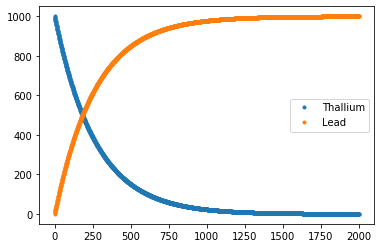

In [42]:
T = 2000

Tl = np.zeros(T)
Pb = np.zeros(T)
d = []
Tl[0] = 1000
Pb[0] = 0
hl = 3.052 * 60 #seconds

for i in range(1,T):
    p = 1 - 2**(-i/hl)
    dec = Tl[0] * p
    Tl[i] = Tl[0] - dec
    Pb[i] = Pb[0] + dec

plt.plot(Tl,'.') 
plt.plot(Pb,'.')
plt.legend(("Thallium","Lead"))
plt.show()

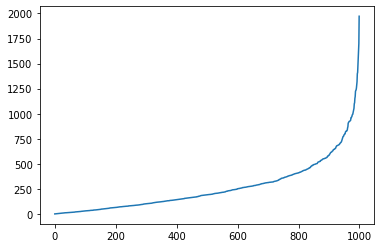

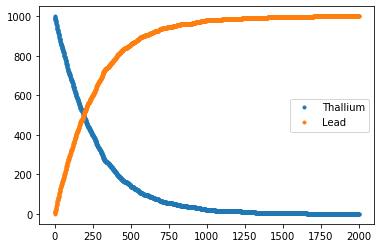

In [48]:
def expon_icdf(p, mu=1/hl):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log2(1-p)/mu

dec = []
for i in range(int(Tl[0])):
    r = np.random.random()
    x = expon_icdf(r)
    dec.append(x)

dec = np.sort(dec)
plt.plot(dec)
plt.show()

for i in range(1,T):
    d = dec[dec<=i].shape[0]
    Tl[i] = Tl[0] - d
    Pb[i] = d

plt.plot(Tl,'.') 
plt.plot(Pb,'.')
plt.legend(("Thallium","Lead"))
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

0.055918


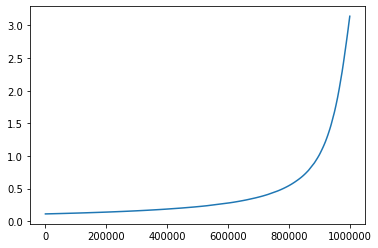

In [55]:
Z=79
E=7.7*10**6*sc.e
N_alfa= 10**6
a0 = sc.physical_constants['Bohr radius'][0]

n = 1000000
z = np.random.random(n)
b = z * (a0/100) # maybe wrong?

const=Z*(sc.e)**2/(2*np.pi*sc.epsilon_0*E)
theta = 2*np.arctan(const/b)

plt.plot(np.sort(theta))
bounce = theta[theta>(np.pi/2)].shape[0]
print(bounce/n)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

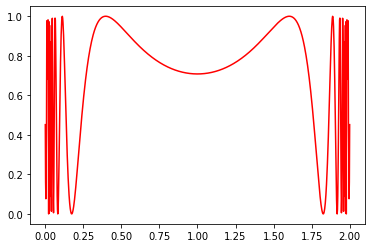

Monte Carlo integration:  1.4432
Error:  0.008201497167697802
Mean Value integration:  1.4472953094087952
Error:  0.004106187758902591


C:\Users\artur\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (10000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.


In [67]:
import scipy.integrate as integrate

def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')
plt.show()

I_t = integrate.quad(f,0,2,limit=10000)[0]

# Monte Carlo integration
N=10000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print("Monte Carlo integration: ",I)
print("Error: ", abs(I-I_t))

x=2*np.random.random(N)
values = [f(i) for i in x]

I2=2*np.sum(values)/N
print("Mean Value integration: ",I2)
print("Error: ", abs(I2- I_t))

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [85]:
def sphere_func(x):
    return int(np.sum(np.square(x)) <= 1)

def compute_area(dim, N=10000):
    z = 2*np.random.random(size=(N,dim))-1 #random values from -1 to 1
    c = [sphere_func(z[i,:]) for i in range(N)]
    I = 2**dim*np.sum(c)/N
    return I

print("Area circle: ", compute_area(2))
print("Area 10D sphere: ", compute_area(10,1000000))

Area circle:  3.1372
Area 10D sphere:  2.594816


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [96]:
def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return x**(-0.5)

N=10000
x=np.random.random(N)

I=np.sum(f(x)/w(x))*2/N

print("Monte Carlo integration:", I)
print('Error:',np.abs(I-integrate.quad(f,0,1)[0]))

Monte Carlo integration: 0.75964893037313
Error: 0.07928402964025383
